In [1]:
import numpy
import GA
import pickle
import ANN
import matplotlib.pyplot

In [2]:
f = open("dataset_features.pkl", "rb")
data_inputs2 = pickle.load(f)
f.close()
features_STDs = numpy.std(a=data_inputs2, axis=0)
data_inputs = data_inputs2[:, features_STDs>50]

f = open("outputs.pkl", "rb")
data_outputs = pickle.load(f)
f.close()

In [3]:
sol_per_pop = 8
num_parents_mating = 4
num_generations = 100
mutation_percent = 10

In [4]:
initial_pop_weights = []
for curr_sol in numpy.arange(0, sol_per_pop):
    HL1_neurons = 150
    input_HL1_weights = numpy.random.uniform(low=-0.1, high=0.1, 
                                             size=(data_inputs.shape[1], HL1_neurons))
    HL2_neurons = 60
    HL1_HL2_weights = numpy.random.uniform(low=-0.1, high=0.1, 
                                             size=(HL1_neurons, HL2_neurons))
    output_neurons = 4
    HL2_output_weights = numpy.random.uniform(low=-0.1, high=0.1, 
                                              size=(HL2_neurons, output_neurons))

    initial_pop_weights.append(numpy.array([input_HL1_weights, 
                                                HL1_HL2_weights, 
                                                HL2_output_weights]))

In [5]:
pop_weights_mat = numpy.array(initial_pop_weights)
pop_weights_vector = GA.mat_to_vector(pop_weights_mat)

best_outputs = []
accuracies = numpy.empty(shape=(num_generations))

In [6]:
for generation in range(num_generations):
    print("Generation : ", generation)

    # converting the solutions from being vectors to matrices.
    pop_weights_mat = GA.vector_to_mat(pop_weights_vector, 
                                       pop_weights_mat)

    # Measuring the fitness of each chromosome in the population.
    fitness = ANN.fitness(pop_weights_mat, 
                          data_inputs, 
                          data_outputs, 
                          activation="sigmoid")
    accuracies[generation] = fitness[0]
    print("Fitness")
    print(fitness)

    # Selecting the best parents in the population for mating.
    parents = GA.select_mating_pool(pop_weights_vector, 
                                    fitness.copy(), 
                                    num_parents_mating)
    print("Parents")
    print(parents)

    # Generating next generation using crossover.
    offspring_crossover = GA.crossover(parents,
                                       offspring_size=(pop_weights_vector.shape[0]-parents.shape[0], pop_weights_vector.shape[1]))
    print("Crossover")
    print(offspring_crossover)

    # Adding some variations to the offsrping using mutation.
    offspring_mutation = GA.mutation(offspring_crossover, 
                                     mutation_percent=mutation_percent)
    print("Mutation")
    print(offspring_mutation)

    # Creating the new population based on the parents and offspring.
    pop_weights_vector[0:parents.shape[0], :] = parents
    pop_weights_vector[parents.shape[0]:, :] = offspring_mutation

Generation :  0
Fitness
[24.9745158 24.9745158 25.0764526 24.9745158 24.9745158 24.9745158
 25.0764526 25.0764526]
Parents
[[-0.07240319  0.00159268  0.02342207 ...  0.09688439  0.00179154
  -0.04529153]
 [-0.03215104  0.09025266  0.07294593 ...  0.09096402 -0.02256528
  -0.03164141]
 [ 0.07000357  0.03896256 -0.00980774 ... -0.00691533 -0.04291941
  -0.0219271 ]
 [ 0.00166393  0.07439863  0.0872203  ... -0.09042811  0.03921657
  -0.01656222]]
Crossover
[[-0.07240319  0.00159268  0.02342207 ...  0.09096402 -0.02256528
  -0.03164141]
 [-0.03215104  0.09025266  0.07294593 ... -0.00691533 -0.04291941
  -0.0219271 ]
 [ 0.07000357  0.03896256 -0.00980774 ... -0.09042811  0.03921657
  -0.01656222]
 [ 0.00166393  0.07439863  0.0872203  ...  0.09688439  0.00179154
  -0.04529153]]
Mutation
[[-0.07240319  0.00159268  0.02342207 ...  0.09096402 -0.02256528
  -0.03164141]
 [-0.03215104  0.09025266  0.07294593 ... -0.00691533 -0.04291941
  -0.0219271 ]
 [ 0.07000357  0.03896256 -0.00980774 ... -0.0

/home/mpi/Desktop/EANN/NeuralGenetic/ANN.py:4: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0+numpy.exp(-1*inpt))


Fitness
[25.0764526 25.0764526 25.0764526 24.9745158 25.0764526 25.0764526
 24.9745158 25.0764526]
Parents
[[-0.07240319  0.00159268  0.02342207 ...  0.09688439  0.00179154
  -0.04529153]
 [-0.03215104  0.09025266  0.07294593 ...  0.09096402 -0.02256528
  -0.03164141]
 [ 0.07000357  0.03896256 -0.00980774 ... -0.00691533 -0.04291941
  -0.0219271 ]
 [-0.07240319  0.00159268  0.02342207 ...  0.09096402 -0.02256528
  -0.03164141]]
Crossover
[[-0.07240319  0.00159268  0.02342207 ...  0.09096402 -0.02256528
  -0.03164141]
 [-0.03215104  0.09025266  0.07294593 ... -0.00691533 -0.04291941
  -0.0219271 ]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09096402 -0.02256528
  -0.03164141]
 [-0.07240319  0.00159268  0.02342207 ...  0.09688439  0.00179154
  -0.04529153]]
Mutation
[[-0.07240319  0.00159268  0.02342207 ...  0.09096402 -0.02256528
  -0.03164141]
 [-0.03215104  0.09025266  0.07294593 ... -0.00691533 -0.04291941
  -0.0219271 ]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09096402 -0.02256

Fitness
[40.36697248 38.0224261  36.08562691 35.01529052 48.52191641 37.2579001
 31.70234455 24.9745158 ]
Parents
[[ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]]
Crossover
[[ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]]
Mutation
[[ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  

Fitness
[51.12130479 49.9490316  49.9490316  49.8470948  50.0509684  50.0509684
 57.39041794 53.61875637]
Parents
[[ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]]
Crossover
[[ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]]
Mutation
[[ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  

Fitness
[57.39041794 54.94393476 53.61875637 53.00713558 25.1783894  42.66055046
 32.00815494 38.93985729]
Parents
[[ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]]
Crossover
[[ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]]
Mutation
[[ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439 

Fitness
[60.04077472 58.25688073 57.39041794 56.11620795 51.63098879 44.69928644
 56.98267074 48.16513761]
Parents
[[ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]]
Crossover
[[ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]]
Mutation
[[ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439 

Fitness
[61.26401631 60.04077472 59.88786952 59.68399592 58.25688073 60.55045872
 56.52395515 50.1019368 ]
Parents
[[ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]]
Crossover
[[ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]]
Mutation
[[ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439 

Fitness
[61.26401631 60.55045872 60.55045872 60.14271152 46.27930683 43.11926606
 28.84811417 60.39755352]
Parents
[[ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]]
Crossover
[[ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]]
Mutation
[[ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439 

Fitness
[63.71049949 63.65953109 63.30275229 61.26401631 57.84913354 52.19164118
 43.22120285 56.52395515]
Parents
[[ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]]
Crossover
[[ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]]
Mutation
[[ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439 

Fitness
[70.99898063 66.92150866 66.61569827 65.59633028 45.71865443 66.51376147
 42.76248726 53.92456677]
Parents
[[ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]]
Crossover
[[ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]]
Mutation
[[ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439 

Fitness
[73.64933741 72.06931702 71.40672783 71.25382263 41.43730887 55.65749235
 45.66768603 53.26197757]
Parents
[[ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]]
Crossover
[[ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]]
Mutation
[[ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439 

Fitness
[74.10805301 74.10805301 73.90417941 73.64933741 72.78287462 73.49643221
 25.68807339 74.31192661]
Parents
[[ 0.07000357  0.03896256 -0.00980774 ... -0.22152908  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ... -0.22152908  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ... -0.22152908  0.00179154
  -0.04529153]]
Crossover
[[ 0.07000357  0.03896256 -0.00980774 ... -0.22152908  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ... -0.22152908  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ... -0.22152908  0.00179154
  -0.04529153]]
Mutation
[[ 0.07000357  0.03896256 -0.00980774 ... -0.22152908  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ...  0.09688439  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ... -0.22152908 

Fitness
[74.36289501 74.31192661 74.20998981 74.15902141 54.07747197 52.90519878
 62.3343527  62.7420999 ]
Parents
[[ 0.07000357  0.03896256 -0.00980774 ... -0.22152908  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ... -0.22152908  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ... -0.22152908  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ... -0.22152908  0.00179154
  -0.04529153]]
Crossover
[[ 0.07000357  0.03896256 -0.00980774 ... -0.22152908  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ... -0.22152908  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ... -0.22152908  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ... -0.22152908  0.00179154
  -0.04529153]]
Mutation
[[ 0.07000357  0.03896256 -0.00980774 ... -0.22152908  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ... -0.22152908  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ... -0.22152908 

Fitness
[74.36289501 74.31192661 74.31192661 74.20998981 73.59836901 73.90417941
 73.49643221 74.36289501]
Parents
[[ 0.07000357  0.03896256 -0.00980774 ... -0.22152908  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ... -0.22152908  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ... -0.22152908  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ... -0.22152908  0.00179154
  -0.04529153]]
Crossover
[[ 0.07000357  0.03896256 -0.00980774 ... -0.22152908  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ... -0.22152908  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ... -0.22152908  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ... -0.22152908  0.00179154
  -0.04529153]]
Mutation
[[ 0.07000357  0.03896256 -0.00980774 ... -0.22152908  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ... -0.22152908  0.00179154
  -0.04529153]
 [ 0.07000357  0.03896256 -0.00980774 ... -0.22152908 

In [7]:
pop_weights_mat = GA.vector_to_mat(pop_weights_vector, pop_weights_mat)
best_weights = pop_weights_mat [0, :]
acc, predictions = ANN.predict_outputs(best_weights, data_inputs, data_outputs, activation="sigmoid")
print("Accuracy of the best solution is : ", acc)

Accuracy of the best solution is :  74.36289500509685


/home/mpi/Desktop/EANN/NeuralGenetic/ANN.py:4: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0+numpy.exp(-1*inpt))


In [10]:
best_weights.shape

(3,)

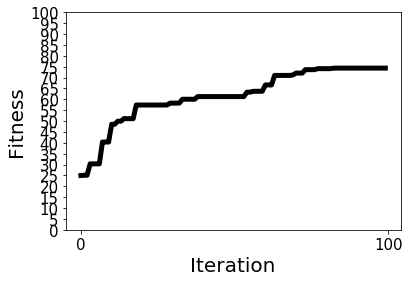

In [8]:
matplotlib.pyplot.plot(accuracies, linewidth=5, color="black")
matplotlib.pyplot.xlabel("Iteration", fontsize=20)
matplotlib.pyplot.ylabel("Fitness", fontsize=20)
matplotlib.pyplot.xticks(numpy.arange(0, num_generations+1, 100), fontsize=15)
matplotlib.pyplot.yticks(numpy.arange(0, 101, 5), fontsize=15)

f = open("weights_"+str(num_generations)+"_iterations_"+str(mutation_percent)+"%_mutation.pkl", "wb")
pickle.dump(pop_weights_mat, f)
f.close()